# Preliminary

## Context

- Pour poser une question sur ce site, il faut entrer plusieurs tags afin de retrouver facilement la question par la suite. Pour les utilisateurs expérimentés, cela ne pose pas de problème, mais pour les nouveaux utilisateurs, il serait judicieux de suggérer quelques tags relatifs à la question posée.

- Amateur de Stack Overflow, qui vous a souvent sauvé la mise, vous décidez d'aider la communauté en retour. Pour cela, vous développez un système de suggestion de tags pour le site. Celui-ci prendra la forme d’un algorithme de machine learning qui assignera automatiquement plusieurs tags pertinents à une question.

## Imports

In [1]:
# Builtin
import os
print(os.getcwd())

# Data
import numpy as np
import pandas as pd

# Visualisation
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing
import sklearn


print("Numpy : {}".format(np.__version__))
print("Pandas : {}".format(pd.__version__))
print("Missingno Version : {}".format(msno.__version__))
print("Matplotlib Version : {}".format(matplotlib.__version__))
print("Seaborn Version : {}".format(sns.__version__))
print("Scikit-Learn Version : {}".format(sklearn.__version__))

C:\Users\Lemel\OPC-P5
Numpy : 1.23.5
Pandas : 1.5.3
Missingno Version : 0.4.2
Matplotlib Version : 3.7.0
Seaborn Version : 0.12.2
Scikit-Learn Version : 1.2.1


# Fonctions

In [2]:
def shape2(df):
    """
    Analyzes the shape of the dataframe: 1) Open it, give some infos 2) Nan values 3) Describe method
    """

    # Head & tail
    df_combined = pd.concat([df.head(), df.tail()], axis=0)
    display(df_combined)
    print("\nNumber of Rows: ", df.shape[0])
    print("Number of Columns: ", df.shape[1])

    for col in df.columns:
            print("Column {}: {}".format(col, df[col].dtype))

    for col in df.columns:
            print("\nUnique values in {}:".format(col))
            print(df[col].unique())

    # N_unique values
    nunique_dict = {col: df[col].nunique() for col in df.columns}
    nunique_df = pd.DataFrame.from_dict(nunique_dict, orient='index', columns=['N_unique values'])
    display(nunique_df)

    # Value counts and missing/duplicated data
    if 'type' in df.columns:
        print("\nValue counts of 'type':")
        print(df['type'].value_counts())
    else:
        print("\n'type' column not found in dataframe.")
    print("\nNumber of missing values:")
    print(df.isna().sum())
    print("\nNumber of duplicated rows:")
    print(df.duplicated().sum())

    # Seaborn heatmap
    print("\nSeaborn heatmap:")
    sns.heatmap(df.isnull(), cmap='viridis')
    plt.show()

# Data

In [3]:
# Data acces
path = "C:\\Users\\Lemel\\OPC-P5"

# Importation des dataframes
df = pd.read_csv(os.path.join(path, "df.csv"))

In [4]:
df.head()

,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount,_Tags,_Most_Common_Tag,_Body,...,_Body_lemmatize,_Title_Body,_Title_Body_stem,_Title_Body_lemmatize,_Body_stem_tokens,_Body_lemmatized_tokens,_Title_stem_tokens,_Title_lemmatized_tokens,_Title_Body_stem_tokens,_Title_Body_lemmatized_tokens
0,jtextarea - selection behavior on double / tri...,<p><strong>the problem:</strong> when you doub...,<java><swing><selection><jtextarea><double-click>,3,424,0,1,"['java', 'swing', 'selection', 'jtextarea', 'd...",java,the problem: when you double click on word in ...,...,"problem : double click word jtextarea marked ,...",jtextarea selection behavior on double triple ...,jtextarea select behavior doubl tripl click mo...,jtextarea selection behavior double triple cli...,184,184,8,8,192,192
1,set the xlink:href attribute of an svg <image>...,<p>i need to set the 'xlink:href' attribute on...,<css><image><svg><href><xlink>,4,4218,0,1,"['css', 'image', 'svg', 'href', 'xlink']",css,i needlanguage to set the 'xlink:href' attribu...,...,needlanguage set 'xlink : href ' attribute svg...,set the xlink:href attribute of an svg element...,set xlink : href attribut svg element language...,set xlink : href attribute svg element languag...,16,16,8,8,24,24
2,wrapping symbols during linking on os x,<p>i'm trying to wrap one symbol by another du...,<c++><macos><gcc><shared-libraries><ld>,1,1927,0,1,"['c++', 'macos', 'gcc', 'shared-libraries', 'ld']",c++,i'm trying to wrap one symbol by another durin...,...,'m trying wrap one symbol another link . under...,wrapping symbols during linking on os x_i'm tr...,wrap symbol link os x_i 'm tri wrap one symbol...,wrapping symbol linking o x_i 'm trying wrap o...,174,174,5,5,179,179
3,faster way to write binary file with python/cy...,<p>i checked 2 ways to read a binary file usin...,<python><struct><cython><binaryfiles><mmap>,2,1269,0,1,"['python', 'struct', 'cython', 'binaryfiles', ...",python,i checked 2 ways to read a binary file using p...,...,checked 2 way read binary file using python/cy...,faster way to write binary file with python/cy...,faster way write binari file python/cython_i c...,faster way write binary file python/cython_i c...,269,269,6,6,275,275
4,gcc: strip unused functions,<p>i noticed that sometimes even if i don't us...,<c++><visual-studio><gcc><visual-c++><iostream>,20,6095,0,1,"['c++', 'visual-studio', 'gcc', 'visual-c++', ...",c++,i noticed that sometimes even if i don't use i...,...,noticed sometimes even n't use iostream relate...,gcc: strip unused functions_i noticed that som...,gcc : strip unus functions_i notic sometim eve...,gcc : strip unused functions_i noticed sometim...,1585,1585,5,5,1590,1590


# Création du dataset final
**Pour les features, on garde pas le Score, Viewcount Answercount etc variables parceque lorsque on mettra en prédiction les modèles ce sera des données non disponible qui donc peuvent mener à un data leakage. On garde notre travail de feature engineering avec la variable lemmatizé body + title.**  
**Pour les labels, nous sommes sur du multiclassoutput et multilabels (multiclass car 25 labels différents, et multilabels car chaque individus à la possibilité d'être dans chacun des labels possible) => on fait un "one hot encoding" des 25 most commons tags.**

In [5]:
df2 = df.copy()

,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount,_Tags,_Most_Common_Tag,_Body,...,_Body_lemmatize,_Title_Body,_Title_Body_stem,_Title_Body_lemmatize,_Body_stem_tokens,_Body_lemmatized_tokens,_Title_stem_tokens,_Title_lemmatized_tokens,_Title_Body_stem_tokens,_Title_Body_lemmatized_tokens
0,jtextarea - selection behavior on double / tri...,<p><strong>the problem:</strong> when you doub...,<java><swing><selection><jtextarea><double-click>,3,424,0,1,"['java', 'swing', 'selection', 'jtextarea', 'd...",java,the problem: when you double click on word in ...,...,"problem : double click word jtextarea marked ,...",jtextarea selection behavior on double triple ...,jtextarea select behavior doubl tripl click mo...,jtextarea selection behavior double triple cli...,184,184,8,8,192,192
1,set the xlink:href attribute of an svg <image>...,<p>i need to set the 'xlink:href' attribute on...,<css><image><svg><href><xlink>,4,4218,0,1,"['css', 'image', 'svg', 'href', 'xlink']",css,i needlanguage to set the 'xlink:href' attribu...,...,needlanguage set 'xlink : href ' attribute svg...,set the xlink:href attribute of an svg element...,set xlink : href attribut svg element language...,set xlink : href attribute svg element languag...,16,16,8,8,24,24
2,wrapping symbols during linking on os x,<p>i'm trying to wrap one symbol by another du...,<c++><macos><gcc><shared-libraries><ld>,1,1927,0,1,"['c++', 'macos', 'gcc', 'shared-libraries', 'ld']",c++,i'm trying to wrap one symbol by another durin...,...,'m trying wrap one symbol another link . under...,wrapping symbols during linking on os x_i'm tr...,wrap symbol link os x_i 'm tri wrap one symbol...,wrapping symbol linking o x_i 'm trying wrap o...,174,174,5,5,179,179
3,faster way to write binary file with python/cy...,<p>i checked 2 ways to read a binary file usin...,<python><struct><cython><binaryfiles><mmap>,2,1269,0,1,"['python', 'struct', 'cython', 'binaryfiles', ...",python,i checked 2 ways to read a binary file using p...,...,checked 2 way read binary file using python/cy...,faster way to write binary file with python/cy...,faster way write binari file python/cython_i c...,faster way write binary file python/cython_i c...,269,269,6,6,275,275
4,gcc: strip unused functions,<p>i noticed that sometimes even if i don't us...,<c++><visual-studio><gcc><visual-c++><iostream>,20,6095,0,1,"['c++', 'visual-studio', 'gcc', 'visual-c++', ...",c++,i noticed that sometimes even if i don't use i...,...,noticed sometimes even n't use iostream relate...,gcc: strip unused functions_i noticed that som...,gcc : strip unus functions_i notic sometim eve...,gcc : strip unused functions_i noticed sometim...,1585,1585,5,5,1590,1590
49995,creating oobb from points,<p>how can i create minimal oobb for given poi...,<c++><graphics><geometry><3d><3d-reconstruction>,19,16638,0,3,"['c++', 'graphics', 'geometry', '3d', '3d-reco...",c++,how can i create minimal oobb for given points...,...,create minimal oobb given point ? creating aab...,creating oobb from points_how can i create min...,creat oobb points_how creat minim oobb given p...,creating oobb points_how create minimal oobb g...,73,73,3,3,76,76
49996,is there anyway to open a facebook url in the ...,<blockquote>\n <p><strong>possible duplicate:...,<iphone><android><html><facebook><blackberry>,4,19034,0,3,"['iphone', 'android', 'html', 'facebook', 'bla...",iphone,possible duplicate: launch facebook app from o...,...,possible duplicate : launch facebook app app w...,is there anyway to open a facebook url in the ...,anyway open facebook url facebook app phone ? ...,anyway open facebook url facebook app phone ? ...,29,29,8,8,37,37
49997,dependency property in user control works only...,<p>i have several custom user controls in a wi...,<c#><wpf><xaml><user-controls><dependency-prop...,4,1901,0,1,"['c#', 'wpf', 'xaml', 'user-controls', 'depend...",c#,i have several custom user controls in a windo...,...,several custom user control window . appear dy...,dependency property 


Number of Rows:  50000
Number of Columns:  24
Column Title: object
Column Body: object
Column Tags: object
Column Score: int64
Column ViewCount: int64
Column FavoriteCount: int64
Column AnswerCount: int64
Column _Tags: object
Column _Most_Common_Tag: object
Column _Body: object
Column _Title: object
Column _Title_stem: object
Column _Title_lemmatize: object
Column _Body_stem: object
Column _Body_lemmatize: object
Column _Title_Body: object
Column _Title_Body_stem: object
Column _Title_Body_lemmatize: object
Column _Body_stem_tokens: int64
Column _Body_lemmatized_tokens: int64
Column _Title_stem_tokens: int64
Column _Title_lemmatized_tokens: int64
Column _Title_Body_stem_tokens: int64
Column _Title_Body_lemmatized_tokens: int64

Unique values in Title:
['jtextarea - selection behavior on double / triple click + moving mouse'
 'set the xlink:href attribute of an svg <image> element with css'
 'wrapping symbols during linking on os x' ...
 'dependency property in user control works only 

,N_unique values
Title,49999
Body,50000
Tags,49197
Score,577
ViewCount,18958
FavoriteCount,2
AnswerCount,57
_Tags,49197
_Most_Common_Tag,877
_Body,50000



'type' column not found in dataframe.

Number of missing values:
Title                            0
Body                             0
Tags                             0
Score                            0
ViewCount                        0
FavoriteCount                    0
AnswerCount                      0
_Tags                            0
_Most_Common_Tag                 0
_Body                            0
_Title                           0
_Title_stem                      0
_Title_lemmatize                 0
_Body_stem                       0
_Body_lemmatize                  0
_Title_Body                      0
_Title_Body_stem                 0
_Title_Body_lemmatize            0
_Body_stem_tokens                0
_Body_lemmatized_tokens          0
_Title_stem_tokens               0
_Title_lemmatized_tokens         0
_Title_Body_stem_tokens          0
_Title_Body_lemmatized_tokens    0
dtype: int64

Number of duplicated rows:
0

Seaborn heatmap:


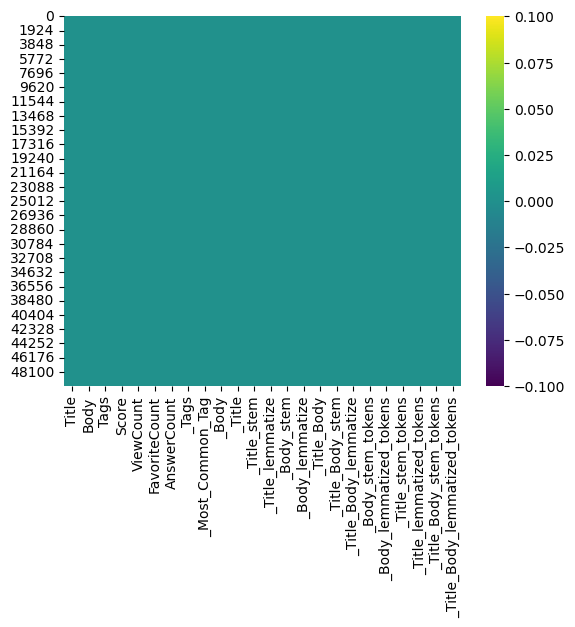

In [6]:
shape2(df2)

In [7]:
# Je sélectionne uniquement les variables qui vont nous interresser (feature et labels)

df2 = df2.loc[:,['_Title_Body_lemmatize','_Tags']]
df2.head()

,_Title_Body_lemmatize,_Tags
0,jtextarea selection behavior double triple cli...,"['java', 'swing', 'selection', 'jtextarea', 'd..."
1,set xlink : href attribute svg element languag...,"['css', 'image', 'svg', 'href', 'xlink']"
2,wrapping symbol linking o x_i 'm trying wrap o...,"['c++', 'macos', 'gcc', 'shared-libraries', 'ld']"
3,faster way write binary file python/cython_i c...,"['python', 'struct', 'cython', 'binaryfiles', ..."
4,gcc : strip unused functions_i noticed sometim...,"['c++', 'visual-studio', 'gcc', 'visual-c++', ..."


In [8]:
# Je sélectionne par le notebook cleaning ma variable des 25 most commons tags 
tags = ['c#', 'java', 'javascript', 'python', 'c++', '.net', 'ios', 'android', 'php', 'html', 'jquery', 'objective-c', 'iphone', 'asp.net', 'c', 'sql', 'css', 'mysql', 'linux', 'ruby-on-rails', 'windows', 'node.js', 'spring', 'sql-server', 'json']

In [9]:
# create a boolean mask to filter rows
mask = df2['_Tags'].apply(lambda x: any(tag in x for tag in tags))

# filter the dataframe using the mask
df2  = df2[mask]
df2 .head()

,_Title_Body_lemmatize,_Tags
0,jtextarea selection behavior double triple cli...,"['java', 'swing', 'selection', 'jtextarea', 'd..."
1,set xlink : href attribute svg element languag...,"['css', 'image', 'svg', 'href', 'xlink']"
2,wrapping symbol linking o x_i 'm trying wrap o...,"['c++', 'macos', 'gcc', 'shared-libraries', 'ld']"
3,faster way write binary file python/cython_i c...,"['python', 'struct', 'cython', 'binaryfiles', ..."
4,gcc : strip unused functions_i noticed sometim...,"['c++', 'visual-studio', 'gcc', 'visual-c++', ..."


,_Title_Body_lemmatize,_Tags
0,jtextarea selection behavior double triple cli...,"['java', 'swing', 'selection', 'jtextarea', 'd..."
1,set xlink : href attribute svg element languag...,"['css', 'image', 'svg', 'href', 'xlink']"
2,wrapping symbol linking o x_i 'm trying wrap o...,"['c++', 'macos', 'gcc', 'shared-libraries', 'ld']"
3,faster way write binary file python/cython_i c...,"['python', 'struct', 'cython', 'binaryfiles', ..."
4,gcc : strip unused functions_i noticed sometim...,"['c++', 'visual-studio', 'gcc', 'visual-c++', ..."
49995,creating oobb points_how create minimal oobb g...,"['c++', 'graphics', 'geometry', '3d', '3d-reco..."
49996,anyway open facebook url facebook app phone ? ...,"['iphone', 'android', 'html', 'facebook', 'bla..."
49997,dependency property user control work first in...,"['c#', 'wpf', 'xaml', 'user-controls', 'depend..."
49998,symfony cache : clear building docker containe...,"['docker', 'symfony', 'scripting', 'composer-p..."
49999,dynamically generate case switch statement usi...,"['php', 'mysql', 'rss', 'foreach', 'switch-sta..."



Number of Rows:  48657
Number of Columns:  2
Column _Title_Body_lemmatize: object
Column _Tags: object

Unique values in _Title_Body_lemmatize:
["jtextarea selection behavior double triple click moving mouse_the problem : double click word jtextarea marked , n't release mouse button try mark next word , marking whole word , single character instead . mark whole word ( single character ) moving mouse ( double click ) . 's literally default behavior program tried , like : notepad , firefox , chrome , word , even netbeans , etc . thing triple click ( holding moving mouse mark next line , character ) . idea ? hard time googling , since 's common thing believe must simple option least someone already solution . sample code : public class testjtextarea public static void main ( final string [ ] args ) final jpanel panel new jpanel ( new borderlayout ( ) ) ; panel.setpreferredsize ( new dimension ( 500 , 500 ) ) ; panel.add ( new jtextarea ( ) , borderlayout.center ) ; final jframe frame new

,N_unique values
_Title_Body_lemmatize,48657
_Tags,47861



'type' column not found in dataframe.

Number of missing values:
_Title_Body_lemmatize    0
_Tags                    0
dtype: int64

Number of duplicated rows:
0

Seaborn heatmap:


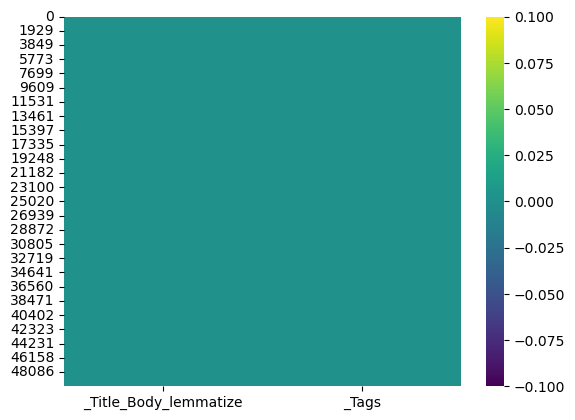

In [10]:
# Nous passion de 50000 individus à 48657
shape2(df2)

In [11]:
# create dummy variables for each tag in the list
# create 25 new columns corresponding to the tags
for tag in tags:
    df2[tag] = df2['_Tags'].apply(lambda x: int(tag in x))

In [12]:
# Nous avons crée un dataset prêt à un apprentissage non supervisé et supervisé. 

df2.drop('_Tags', axis=1, inplace=True)

In [13]:
pd.options.display.max_columns = None
df2.head()

,_Title_Body_lemmatize,c#,java,javascript,python,c++,.net,ios,android,php,html,jquery,objective-c,iphone,asp.net,c,sql,css,mysql,linux,ruby-on-rails,windows,node.js,spring,sql-server,json
0,jtextarea selection behavior double triple cli...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,set xlink : href attribute svg element languag...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,wrapping symbol linking o x_i 'm trying wrap o...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,faster way write binary file python/cython_i c...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,gcc : strip unused functions_i noticed sometim...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Apprentissage non supervisé : Word2Vec

In [14]:
import gensim
from gensim.models import Word2Vec
import numpy as np

sentences = [text.split() for text in df2['_Title_Body_lemmatize']]

# Train the Word2Vec model on the given sentences
model = Word2Vec(sentences, window=5, min_count=1, workers=4)

# Define a function to average the word vectors in a sentence
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    for word in words:
        if word in vocabulary:
            nwords += 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Get the word vector for each sentence and store it in a new DataFrame
word_vectors = np.zeros((len(sentences), 100))
for i, sentence in enumerate(sentences):
    word_vectors[i] = average_word_vectors(sentence, model, model.wv.key_to_index, 100)

X_word2vec = pd.DataFrame(word_vectors)

In [15]:
X_word2vec.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.492338,-0.133019,0.426342,-0.214713,-0.765251,-1.702595,-0.726473,-0.740948,-0.619032,1.450280,-0.613491,0.815678,0.564894,0.430876,0.002772,0.156629,-0.436187,0.469589,-0.812992,-1.706728,-0.313426,0.255331,0.076860,1.360235,-0.334124,-0.867365,-0.035590,0.946314,-1.525546,0.657601,1.738957,-0.290137,-0.578965,-0.983126,-0.031967,2.105084,0.523313,0.775861,0.413843,-0.004807,0.059255,0.470082,-0.942024,-1.801708,0.486399,-0.136142,-0.368150,1.065202,-0.255481,-0.089354,1.383102,-0.698326,-0.970105,-0.462354,-2.163529,0.559283,-0.889870,0.651393,-0.344275,-0.944228,1.422023,1.083373,-0.509834,1.027212,-0.232243,0.252568,0.556700,0.251611,-0.130450,0.101101,-0.803879,0.047770,-0.854953,0.040334,0.034580,0.593058,-1.440020,0.915626,-0.793295,0.395325,1.471930,-0.390965,-1.375171,1.033573,-1.427401,-0.190637,-0.167227,0.168680,-0.053261,-0.169666,-0.425691,-1.019489,-0.478347,0.091350,0.963600,0.727863,1.390687,-1.217933,-0.253038,-2.011119
1,0.215552,0.112190,-0.770843,-1.286350,-0.457720,-0.176037,-1.392493,0.736102,-0.524418,1.451194,0.405949,0.432502,0.780833,0.161466,-0.741308,0.681721,1.246527,-0.294861,-0.124416,-2.110746,0.244108,-2.038267,1.156167,1.460451,-0.696927,-1.277435,-0.283951,-0.663369,-0.110753,-0.033334,1.175561,1.088238,-0.536231,-0.744313,0.556424,0.400973,-0.195211,-0.000437,0.256202,-1.112121,0.009029,-0.561849,-1.177175,-0.218754,1.423483,0.533465,-0.996231,-0.508936,-1.197639,0.497943,1.212094,-0.769164,-0.870469,-1.160935,-1.212350,0.147627,-0.547040,1.659222,-1.085334,-1.335467,0.975633,-0.057619,0.094360,0.339627,-1.262859,0.343806,1.097922,-0.388929,-1.683451,-0.394183,0.439535,1.149513,-0.068683,-0.457529,0.957859,-0.074422,-0.068165,-0.260420,-0.984304,1.548279,0.931493,-0.724280,-0.905402,1.067239,-0.773025,-0.316670,-0.056722,1.435617,1.008153,-0.899807,-1.199623,-0.415622,0.344570,0.341763,1.159059,-0.090560,1.378885,-1.074148,-0.938457,-0.062366
2,-0.302457,-0.078689,0.529751,-0.686663,-1.138987,-1.073593,-1.203711,-0.334815,-0.015618,1.745717,-0.298612,0.433450,0.701067,0.588300,-0.923479,0.037118,-0.018201,0.311218,-0.324385,-1.796944,0.201056,-0.528046,0.032922,1.144195,-0.370415,-0.431739,-0.176903,0.121270,-0.858628,0.385202,1.310955,0.061448,0.050268,-1.102252,-0.090866,0.915016,0.473972,0.713143,0.438022,-1.025530,0.326103,-0.386446,-0.849814,-1.182605,0.280140,0.446242,-0.714189,0.401146,-0.725859,0.065361,1.504235,-0.746282,-0.751325,-0.346300,-1.687910,0.190540,-0.063556,0.295799,-0.670531,-0.757143,0.986325,0.573812,-0.644008,1.592982,-0.445496,0.070213,0.783681,-0.084261,-0.330199,0.512783,-0.855171,0.108501,-0.425741,-0.061676,0.861290,0.127761,-1.198613,0.087190,-0.852704,0.827455,0.782618,-0.533048,-1.341074,1.119492,-1.595049,-0.376001,-0.521453,0.436940,0.228453,-0.408152,-0.111256,-0.802212,-0.245388,0.430576,0.309589,0.307897,0.908458,-0.489294,-0.941223,-1.126374
3,0.079549,0.088261,0.842380,-0.747431,-0.384689,-1.284740,-1.015322,-0.733652,-0.454737,1.266513,0.025565,-0.254955,0.614027,0.214027,-0.319256,0.058220,0.066598,1.078439,-0.286555,-1.566612,-0.122284,0.067505,-0.612439,1.059489,-0.249436,-0.383675,-0.120919,1.021141,-0.367664,0.059552,0.532748,0.021716,-0.028967,-0.393827,-0.257212,1.247351,1.054046,0.315337,0.661825,-0.531517,0.470419,0.448143,-0.862099,-1.294222,0.051779,-0.459694,-0.724171,0.424355,-1.010756,0.405517,1.076885,-1.181481,-1.210446,-0.460875,-1.896494,0.295527,-0.945370,0.738577,-0.087882,-0.185207,0.635319,0.625769,-0.087107,1.266181,-0.054804,0.253827,1.067596,0.273226,-0.484315,0.026509,-0.765102,0.486080,-0.393497,-0.519808,0.202572,1.162573,-1.771058,0.498699,-1.052616,0.557111,0.302343,0.012819,-1.098073,1.330254,-1.629402,0.073652,-0.515244,0.069117

In [16]:
X_word2vec.shape

(48657, 100)

In [17]:
df2_tags = df2.iloc[:, 1:] # toutes les colonnes tags de df2
df2_Word2Vec = pd.concat([X_word2vec, df2_tags], axis=1) # on concatenne horizontalement
df2_Word2Vec.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,c#,java,javascript,python,c++,.net,ios,android,php,html,jquery,objective-c,iphone,asp.net,c,sql,css,mysql,linux,ruby-on-rails,windows,node.js,spring,sql-server,json
0,-0.492338,-0.133019,0.426342,-0.214713,-0.765251,-1.702595,-0.726473,-0.740948,-0.619032,1.450280,-0.613491,0.815678,0.564894,0.430876,0.002772,0.156629,-0.436187,0.469589,-0.812992,-1.706728,-0.313426,0.255331,0.076860,1.360235,-0.334124,-0.867365,-0.035590,0.946314,-1.525546,0.657601,1.738957,-0.290137,-0.578965,-0.983126,-0.031967,2.105084,0.523313,0.775861,0.413843,-0.004807,0.059255,0.470082,-0.942024,-1.801708,0.486399,-0.136142,-0.368150,1.065202,-0.255481,-0.089354,1.383102,-0.698326,-0.970105,-0.462354,-2.163529,0.559283,-0.889870,0.651393,-0.344275,-0.944228,1.422023,1.083373,-0.509834,1.027212,-0.232243,0.252568,0.556700,0.251611,-0.130450,0.101101,-0.803879,0.047770,-0.854953,0.040334,0.034580,0.593058,-1.440020,0.915626,-0.793295,0.395325,1.471930,-0.390965,-1.375171,1.033573,-1.427401,-0.190637,-0.167227,0.168680,-0.053261,-0.169666,-0.425691,-1.019489,-0.478347,0.091350,0.963600,0.727863,1.390687,-1.217933,-0.253038,-2.011119,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.215552,0.112190,-0.770843,-1.286350,-0.457720,-0.176037,-1.392493,0.736102,-0.524418,1.451194,0.405949,0.432502,0.780833,0.161466,-0.741308,0.681721,1.246527,-0.294861,-0.124416,-2.110746,0.244108,-2.038267,1.156167,1.460451,-0.696927,-1.277435,-0.283951,-0.663369,-0.110753,-0.033334,1.175561,1.088238,-0.536231,-0.744313,0.556424,0.400973,-0.195211,-0.000437,0.256202,-1.112121,0.009029,-0.561849,-1.177175,-0.218754,1.423483,0.533465,-0.996231,-0.508936,-1.197639,0.497943,1.212094,-0.769164,-0.870469,-1.160935,-1.212350,0.147627,-0.547040,1.659222,-1.085334,-1.335467,0.975633,-0.057619,0.094360,0.339627,-1.262859,0.343806,1.097922,-0.388929,-1.683451,-0.394183,0.439535,1.149513,-0.068683,-0.457529,0.957859,-0.074422,-0.068165,-0.260420,-0.984304,1.548279,0.931493,-0.724280,-0.905402,1.067239,-0.773025,-0.316670,-0.056722,1.435617,1.008153,-0.899807,-1.199623,-0.415622,0.344570,0.341763,1.159059,-0.090560,1.378885,-1.074148,-0.938457,-0.062366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.302457,-0.078689,0.529751,-0.686663,-1.138987,-1.073593,-1.203711,-0.334815,-0.015618,1.745717,-0.298612,0.433450,0.701067,0.588300,-0.923479,0.037118,-0.018201,0.311218,-0.324385,-1.796944,0.201056,-0.528046,0.032922,1.144195,-0.370415,-0.431739,-0.176903,0.121270,-0.858628,0.385202,1.310955,0.061448,0.050268,-1.102252,-0.090866,0.915016,0.473972,0.713143,0.438022,-1.025530,0.326103,-0.386446,-0.849814,-1.182605,0.280140,0.446242,-0.714189,0.401146,-0.725859,0.065361,1.504235,-0.746282,-0.751325,-0.346300,-1.687910,0.190540,-0.063556,0.295799,-0.670531,-0.757143,0.986325,0.573812,-0.644008,1.592982,-0.445496,0.070213,0.783681,-0.084261,-0.330199,0.512783,-0.855171,0.108501,-0.425741,-0.061676,0.861290,0.127761,-1.198613,0.087190,-0.852704,0.827455,0.782618,-0.533048,-1.341074,1.119492,-1.595049,-0.376001,-0.521453,0.436940,0.228453,-0.408152,-0.111256,-0.802212,-0.245388,0.430576,0.309589,0.307897,0.908458,-0.489294,-0.941223,-1.126374,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.079549,0.088261,0.842380,-0.747431,-0.384689,-1.284740,-1.015322,-0.733652,-0.454737,1.266513,0.025565,-0.254955,0.614027,0.214027,-0.319256,0.058220,0.066598,1.078439,-0.286555,-1.566612,-0.122284,0.067505,-0.612439,1.059489,-0.249436,-0.383675,-0.120919,1.021141,-0.367664,0.059552,0.532748,0.021716,-0.028967,-0.393827,-0.257212,1.247351,1.054046,0.315337,0.661825

# Apprentissage non supervisé : SBERT & USE

In [37]:
import tensorflow_hub as hub

In [ ]:
#création d'une fonction; extraction de feature : sentence embeddings 
def get_sentence_embeddings(texts, model_url):
    embed = hub.load(model_url)
    embeddings = embed(texts)
    return embeddings.numpy()

# Utilisation des modèles pré-entraînés de SBERT and USE
sbert_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
df_sbert = pd.DataFrame(get_sentence_embeddings(df2['_Title_Body_lemmatize'], sbert_url))
df_use = pd.DataFrame(get_sentence_embeddings(df2['_Title_Body_lemmatize'], use_url))


In [ ]:
df_use.head()

In [ ]:
df_sbert.head()

# Apprentissage supervisé : Random Forest

## df2_Word2Vec

In [18]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,c#,java,javascript,python,c++,.net,ios,android,php,html,jquery,objective-c,iphone,asp.net,c,sql,css,mysql,linux,ruby-on-rails,windows,node.js,spring,sql-server,json
0,-0.492338,-0.133019,0.426342,-0.214713,-0.765251,-1.702595,-0.726473,-0.740948,-0.619032,1.450280,-0.613491,0.815678,0.564894,0.430876,0.002772,0.156629,-0.436187,0.469589,-0.812992,-1.706728,-0.313426,0.255331,0.076860,1.360235,-0.334124,-0.867365,-0.035590,0.946314,-1.525546,0.657601,1.738957,-0.290137,-0.578965,-0.983126,-0.031967,2.105084,0.523313,0.775861,0.413843,-0.004807,0.059255,0.470082,-0.942024,-1.801708,0.486399,-0.136142,-0.368150,1.065202,-0.255481,-0.089354,1.383102,-0.698326,-0.970105,-0.462354,-2.163529,0.559283,-0.889870,0.651393,-0.344275,-0.944228,1.422023,1.083373,-0.509834,1.027212,-0.232243,0.252568,0.556700,0.251611,-0.130450,0.101101,-0.803879,0.047770,-0.854953,0.040334,0.034580,0.593058,-1.440020,0.915626,-0.793295,0.395325,1.471930,-0.390965,-1.375171,1.033573,-1.427401,-0.190637,-0.167227,0.168680,-0.053261,-0.169666,-0.425691,-1.019489,-0.478347,0.091350,0.963600,0.727863,1.390687,-1.217933,-0.253038,-2.011119,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.215552,0.112190,-0.770843,-1.286350,-0.457720,-0.176037,-1.392493,0.736102,-0.524418,1.451194,0.405949,0.432502,0.780833,0.161466,-0.741308,0.681721,1.246527,-0.294861,-0.124416,-2.110746,0.244108,-2.038267,1.156167,1.460451,-0.696927,-1.277435,-0.283951,-0.663369,-0.110753,-0.033334,1.175561,1.088238,-0.536231,-0.744313,0.556424,0.400973,-0.195211,-0.000437,0.256202,-1.112121,0.009029,-0.561849,-1.177175,-0.218754,1.423483,0.533465,-0.996231,-0.508936,-1.197639,0.497943,1.212094,-0.769164,-0.870469,-1.160935,-1.212350,0.147627,-0.547040,1.659222,-1.085334,-1.335467,0.975633,-0.057619,0.094360,0.339627,-1.262859,0.343806,1.097922,-0.388929,-1.683451,-0.394183,0.439535,1.149513,-0.068683,-0.457529,0.957859,-0.074422,-0.068165,-0.260420,-0.984304,1.548279,0.931493,-0.724280,-0.905402,1.067239,-0.773025,-0.316670,-0.056722,1.435617,1.008153,-0.899807,-1.199623,-0.415622,0.344570,0.341763,1.159059,-0.090560,1.378885,-1.074148,-0.938457,-0.062366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.302457,-0.078689,0.529751,-0.686663,-1.138987,-1.073593,-1.203711,-0.334815,-0.015618,1.745717,-0.298612,0.433450,0.701067,0.588300,-0.923479,0.037118,-0.018201,0.311218,-0.324385,-1.796944,0.201056,-0.528046,0.032922,1.144195,-0.370415,-0.431739,-0.176903,0.121270,-0.858628,0.385202,1.310955,0.061448,0.050268,-1.102252,-0.090866,0.915016,0.473972,0.713143,0.438022,-1.025530,0.326103,-0.386446,-0.849814,-1.182605,0.280140,0.446242,-0.714189,0.401146,-0.725859,0.065361,1.504235,-0.746282,-0.751325,-0.346300,-1.687910,0.190540,-0.063556,0.295799,-0.670531,-0.757143,0.986325,0.573812,-0.644008,1.592982,-0.445496,0.070213,0.783681,-0.084261,-0.330199,0.512783,-0.855171,0.108501,-0.425741,-0.061676,0.861290,0.127761,-1.198613,0.087190,-0.852704,0.827455,0.782618,-0.533048,-1.341074,1.119492,-1.595049,-0.376001,-0.521453,0.436940,0.228453,-0.408152,-0.111256,-0.802212,-0.245388,0.430576,0.309589,0.307897,0.908458,-0.489294,-0.941223,-1.126374,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.079549,0.088261,0.842380,-0.747431,-0.384689,-1.284740,-1.015322,-0.733652,-0.454737,1.266513,0.025565,-0.254955,0.614027,0.214027,-0.319256,0.058220,0.066598,1.078439,-0.286555,-1.566612,-0.122284,0.067505,-0.612439,1.059489,-0.249436,-0.383675,-0.120919,1.021141,-0.367664,0.059552,0.532748,0.021716,-0.028967,-0.393827,-0.257212,1.247351,1.054046,0.315337,0.661825


Number of Rows:  49960
Number of Columns:  125
Column 0: float64
Column 1: float64
Column 2: float64
Column 3: float64
Column 4: float64
Column 5: float64
Column 6: float64
Column 7: float64
Column 8: float64
Column 9: float64
Column 10: float64
Column 11: float64
Column 12: float64
Column 13: float64
Column 14: float64
Column 15: float64
Column 16: float64
Column 17: float64
Column 18: float64
Column 19: float64
Column 20: float64
Column 21: float64
Column 22: float64
Column 23: float64
Column 24: float64
Column 25: float64
Column 26: float64
Column 27: float64
Column 28: float64
Column 29: float64
Column 30: float64
Column 31: float64
Column 32: float64
Column 33: float64
Column 34: float64
Column 35: float64
Column 36: float64
Column 37: float64
Column 38: float64
Column 39: float64
Column 40: float64
Column 41: float64
Column 42: float64
Column 43: float64
Column 44: float64
Column 45: float64
Column 46: float64
Column 47: float64
Column 48: float64
Column 49: float64
Column 50: f

,N_unique values
0,48657
1,48657
2,48657
3,48657
4,48657
...,...
windows,2
node.js,2
spring,2
sql-server,2



'type' column not found in dataframe.

Number of missing values:
0             1303
1             1303
2             1303
3             1303
4             1303
              ... 
windows       1303
node.js       1303
spring        1303
sql-server    1303
json          1303
Length: 125, dtype: int64

Number of duplicated rows:
1112

Seaborn heatmap:


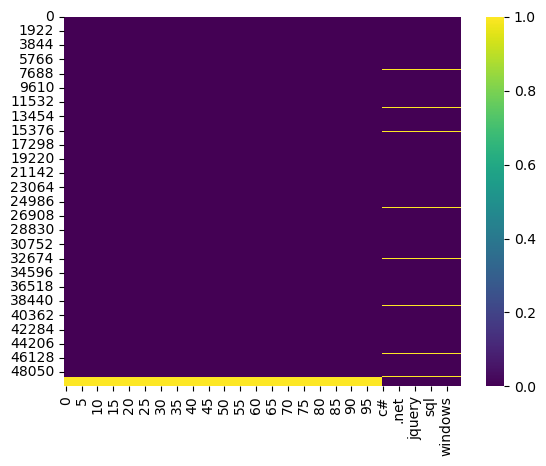

In [19]:
shape2(df2_Word2Vec)

In [20]:
df3_Word2Vec = df2_Word2Vec.copy()

In [21]:
# Présence de missing values
df3_Word2Vec.dropna(inplace=True)

In [22]:
X = df3_Word2Vec.iloc[:, 0:100]
print(X)

              0         1         2         3         4         5         6  \
0     -0.492338 -0.133019  0.426342 -0.214713 -0.765251 -1.702595 -0.726473   
1      0.215552  0.112190 -0.770843 -1.286350 -0.457720 -0.176037 -1.392493   
2     -0.302457 -0.078689  0.529751 -0.686663 -1.138987 -1.073593 -1.203711   
3      0.079549  0.088261  0.842380 -0.747431 -0.384689 -1.284740 -1.015322   
4     -0.286765 -0.144083  1.036293 -0.387314 -1.313810 -1.745962 -2.238793   
...         ...       ...       ...       ...       ...       ...       ...   
48652 -0.217649 -0.222143  0.073826 -0.049181 -0.307444 -1.194315 -0.281490   
48653 -0.675532 -0.406802 -0.211788 -1.062031  0.037570 -2.020068 -0.427697   
48654 -0.165868  0.215696  0.070525 -0.439469 -0.838611 -1.137789 -1.573177   
48655  1.060439 -0.277610  0.090195 -0.700560 -0.042713 -1.582204 -1.248532   
48656  1.067948  0.072291  0.024271 -0.731891 -0.245774 -0.960811 -1.328425   

              7         8         9        10      

In [23]:
# On enregistre chaque variable manuellement pour tester (si automatiquement tester : for i in range(2, 26):exec(f"y{i} = df3_Word2Vec['{''.join(['y', str(i)])}']"))

y1 = df3_Word2Vec['c#']
print(y1)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
48652    1.0
48653    0.0
48654    0.0
48655    0.0
48656    0.0
Name: c#, Length: 47354, dtype: float64


In [24]:
y1 = df3_Word2Vec['c#']
y2 = df3_Word2Vec['java']
y3 = df3_Word2Vec['javascript']
y4 = df3_Word2Vec['python']
y5 = df3_Word2Vec['c++']
y6 = df3_Word2Vec['.net']
y7 = df3_Word2Vec['ios']
y8 = df3_Word2Vec['android']
y9 = df3_Word2Vec['php']
y10 = df3_Word2Vec['html']
y11 = df3_Word2Vec['jquery']
y12 = df3_Word2Vec['objective-c']
y13 = df3_Word2Vec['iphone']
y14 = df3_Word2Vec['asp.net']
y15 = df3_Word2Vec['c']
y16 = df3_Word2Vec['sql']
y17 = df3_Word2Vec['css']
y18 = df3_Word2Vec['mysql']
y19 = df3_Word2Vec['linux']
y20 = df3_Word2Vec['ruby-on-rails']
y21 = df3_Word2Vec['windows']
y22 = df3_Word2Vec['node.js']
y23 = df3_Word2Vec['spring']
y24 = df3_Word2Vec['sql-server']
y25 = df3_Word2Vec['json']

In [25]:
seed = 42

In [26]:
# 47354

X, y1 = make_classification(n_samples=10000, n_features=100, n_informative=98, n_classes=25, random_state=seed)

In [27]:
y2 = shuffle(y1, random_state=seed)
y3 = shuffle(y1, random_state=seed)
y4 = shuffle(y1, random_state=seed)
y5 = shuffle(y1, random_state=seed)
y6 = shuffle(y1, random_state=seed)
y7 = shuffle(y1, random_state=seed)
y8 = shuffle(y1, random_state=seed)
y9 = shuffle(y1, random_state=seed)
y10 = shuffle(y1, random_state=seed)
y11 = shuffle(y1, random_state=seed)
y12 = shuffle(y1, random_state=seed)
y13 = shuffle(y1, random_state=seed)
y14 = shuffle(y1, random_state=seed)
y15 = shuffle(y1, random_state=seed)
y16 = shuffle(y1, random_state=seed)
y17 = shuffle(y1, random_state=seed)
y18 = shuffle(y1, random_state=seed)
y19 = shuffle(y1, random_state=seed)
y20 = shuffle(y1, random_state=seed)
y21 = shuffle(y1, random_state=seed)
y22 = shuffle(y1, random_state=seed)
y23 = shuffle(y1, random_state=seed)
y24 = shuffle(y1, random_state=seed)
y25 = shuffle(y1, random_state=seed)

In [28]:
Y = np.vstack((y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22, y23, y24, y25)).T


In [29]:
n_samples, n_features = X.shape # 10,100
n_outputs = Y.shape[1] # 25
n_classes = 25

In [30]:
forest = RandomForestClassifier(random_state=seed)

In [31]:
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

In [32]:
multi_target_forest.fit(X, Y).predict(X)

array([[21,  9,  9, ...,  9,  9,  9],
       [ 4,  1,  1, ...,  1,  1,  1],
       [ 6, 13, 13, ..., 13, 13, 13],
       ...,
       [24, 19, 19, ..., 19, 19, 19],
       [11, 24, 24, ..., 24, 24, 24],
       [17, 13, 13, ..., 13, 13, 13]])

In [33]:
# scoring='neg_mean_squared_error')

## SBERT 